### Import all necesary libraries

In [147]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os


### Import Set Of Images

In [152]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

## Import all necessary resources

In [208]:

img2 = cv2.imread('/media/prakhar/Linux FIles/Flam Apps/Testing and experiment/cloud_archi/Cloud-Architecture/flam_cards/0.jpg') # trainImage
database_images = load_images_from_folder("/media/prakhar/Linux FIles/Flam Apps/Testing and experiment/cloud_archi/Cloud-Architecture/resources/school_bag")
# database_images = load_images_from_folder("/media/prakhar/Linux FIles/Flam Apps/Testing and experiment/cloud_archi/Cloud-Architecture/resources/flam_cards")


# img1_SIFT = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# img2_SIFT =cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


img1_SIFT = img1
img2_SIFT = img2


####  Select Algoritm and matcher

In [209]:
matching_methods = ["BF_matcher","FLANN_matcher"]

In [156]:
feature_extractions = ["ORB", "SIFT","BRISK"]


In [158]:
matcher_selection = int(input())

1


In [160]:
feature_selection = int(input())

0


In [210]:
print(matching_methods[matcher_selection])
print(feature_extractions[feature_selection])

FLANN_matcher
ORB


### Initialize the keyoint extractor

In [255]:
extractor = None
if feature_selection == 0:
    extractor = cv2.ORB_create()
elif feature_selection ==1:
    extractor = cv2.SIFT_create()
elif feature_selection ==2:
    extractor = cv2.BRISK_create()

### Initilizing the matcher 

In [256]:

matcher =None

if matcher_selection == 0 :
    matcher = cv2.BFMatcher()
elif matcher_selection == 1 and feature_selection == 1:
    matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
elif matcher_selection ==1  and (feature_selection==0 or feature_selection ==2):
    flann_params= dict(algorithm = 6,
                               table_number = 6, # 12
                               key_size = 12,     # 20
                               multi_probe_level = 1) #2
    matcher = cv2.FlannBasedMatcher(flann_params, {})
    


## Matching  images

### Computing keypoints of database

### computing keypoints for all images in data base

In [257]:
kps_database =[]
des_database = []
kps_temp= None
des_temp =None
i=0
for imgi in database_images:
    kps_temp,des_temp = extractor.detectAndCompute(imgi,None)
        
    kps_database.append(kps_temp)
    des_database.append(des_temp)
    

In [258]:
print(len(kps_database))

100


### Computing keypoints in Query image

In [259]:
img1 = cv2.imread('/media/prakhar/Linux FIles/Flam Apps/Testing and experiment/cloud_archi/Cloud-Architecture/real_world_images/5.jpg') # queryImage

### Show Query Image

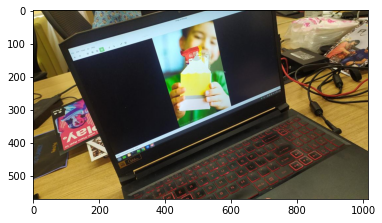

In [260]:
img_test = img1

img_test = cv2.cvtColor(img_test,cv2.COLOR_BGR2RGB)
plt.imshow(img_test)

In [261]:
kp1=None
kp2 =None
des1=None
des2=None
if feature_selection ==0:
    kp1, des1 = extractor.detectAndCompute(img1,None)

### Matching Start

In [262]:
matches = []
matches_temp =None

for descriptors in des_database:
    matches_temp = matcher.knnMatch(des1,descriptors, k=2)
    matches.append(matches_temp)



In [263]:
goods =[]

for mat in matches:
    good = []
    for m_n in mat:
        if len(m_n)!=2:
            continue
        (m,n) = m_n
        if m.distance < 0.6* n.distance:
            good.append(m)
    goods.append(len(good))

print(len(goods))
print(goods)

100
[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 3, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 3, 0, 0, 2, 0, 1, 5, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 3, 0, 0, 1, 2, 0, 0, 0, 1, 1]


In [264]:
max_value = max(goods)

max_index= goods.index(max_value)

print(max_value)
print(max_index)

5
59


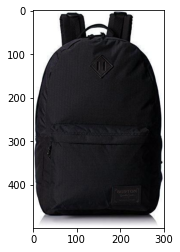

In [265]:
plt.imshow(database_images[max_index])

### Draw Matches